# <img src="https://img.icons8.com/dusk/64/000000/mind-map.png" style="height:50px;display:inline"> EE 044165/6 - Technion - Intro to Machine Learning Lab

## Part 2 - K-NN and Perceptron

### <img src="https://img.icons8.com/bubbles/50/000000/checklist.png" style="height:50px;display:inline"> Agenda

* Recap of Part 1
    * Loading the Data
    * Data Representation
    * Train-Test Separation
    * Naive Bayes
* K Nearset Neighbors (K-NN)
* The Perceptron
* Final Comparison

#### Notes
* To run a code block, select it (with mouse) and press Ctrl + Enter to run it or Shift + Enter to run it and move on to the next block.
* To get description of functions and classes, run `help(name_of_function)`.
* To dislplay lines in the code block, select the block, press ESC and then 'L'.

In [1]:
# imports for the lab
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from helper_functions import email_pipeline
from tqdm import tqdm
# import K-NN classifier
from sklearn.neighbors import KNeighborsClassifier
# import TF-IDF pre-processor
from sklearn.feature_extraction.text import TfidfTransformer

## <img src="https://img.icons8.com/dusk/64/000000/rewind.png" style="height:50px;display:inline"> Recap of Part 1
We will now repeat the process of of loading the data, pre-processing it and splitting it.

#### Copy & Paste relevant code from the previous lab

In [2]:
# load the data
email_data = pd.read_csv('./email_data.csv')
# let's look at 15 random samples from it.
email_data.sample(15)

,To,From,Subject,Content,Label
549,"Russell Turpin <deafbox@hotmail.com>, fork@exa...",Geege Schuman <geege@barrera.org>,RE: Selling Wedded Bliss (was Re: Ouch...),intersectedness: i'd be surprised if beberg ev...,H
2739,HomeFinance85zahav.net.il@webnote.net,r13960@forum.dk,Get the money you need while mortgage rates ar...,iieo\nMortgage companies make you wait\n ...,S
2703,webmaster@efi.ie,Tiffany Grey <hnplayboybaby69@site-personals.com>,I just put my webcam on 4u hunnie=),Wanna see sexually curious teens playing with ...,S
1261,exmh-users@example.com,"""James C. McMaster (Jim)"" <mcmasjc@tatanka.sto...",Re: From,"This is not an exmh problem, but an interactio...",H
412,harley@argote.ch,Gary Lawrence Murphy <garym@canada.com>,Re: Java is for kiddies,">>>>> ""R"" == Robert Harley <harley@argote.ch> ...",H
316,"""R. A. Hettinga"" <rah@shipwright.com>",Tom <tomwhore@slack.net>,Re: The Disappearing Alliance,"\n\nOK, lets break this down into the Kevin Sm...",H
2126,yyyy@example.com,ask <rssfeeds@example.com>,Yoga & Painfree Bliss,URL: http://www.askbjoernhansen.com/archives/2...,H
2214,yyyy@example.com,fark <rssfeeds@example.com>,100 not safe for work pics for chicks. WEENERS.,"URL: http://www.newsisfree.com/click/-2,841368...",H
1167,rpm-zzzlist@freshrpms.net,Matthias Saou <matthias@egwn.net>,"Re: About apt, kernel updates and dist-upgrade","Once upon a time, Peter wrote :\n\n> I started...",H
1117,rpm-zzzlist@freshrpms.net,Matthias Saou <matthias@egwn.net>,Re: ALSA (almost) made easy,"Once upon a time, Ville wrote :\n\n> > Thanks ...",H


In [3]:
X = email_data['Content'].values
y = email_data['Label'].values == 'S' # 1 Spam, 0 for Ham

# split to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

# transform using email_pipeline
X_train_augmented = email_pipeline.fit_transform(X_train)
X_test_augmented = email_pipeline.transform(X_test) 

# get statistics

print("num train samples: {}".format(X_train.shape[0]))
print("num test samples: {}".format(X_test.shape[0]))
print("shape after augmentaion: {}".format(X_train_augmented.shape))
print("fraction of spam in the original: {}".format(np.sum(y == 1) / y.shape[0]))
print("fraction of spam in the train set: {}".format(np.sum(y_train == 1) / y_train.shape[0]))

num train samples: 2441
num test samples: 611
shape after augmentaion: (2441, 501)
fraction of spam in the original: 0.16415465268676277
fraction of spam in the train set: 0.16263826300696435


In [4]:
# copy and paste your implemented Naive Bayes Classifier to use later
def calc_likelihood_params(X, y, dist_type="gaussian", c=1, num_classes=2):
    """
    Calculate the likelihood P(X|y,theta)
    :param X: features
    :param y: labels
    :param dist_type: type of distribution: "gaussian", "bernoulli", "multinomial", "multinomial_smooth"
    :param c: smoothing parameter for "multinomial_smooth"
    :param num_classes: number of classes
    :return likelihood_params
    """
    params = {'type': dist_type}
    if dist_type == 'gaussian':
        mu_s = []
        sigma_s = []
        for i in range(num_classes):
            x_i = X[y == i]
            mu_s.append(np.mean(x_i, axis=0).reshape(1,-1))
            # sigma^2
            sigma_s.append(np.mean(np.square(x_i - mu_s[i]), axis=0))
        params['mu'] = mu_s
        params['sigma'] = sigma_s
    elif dist_type == 'bernoulli':
        p_s = []
        for i in range(num_classes):
            x_i = X[y == i]
            # change to 0-1
            x_i[x_i > 0] = 1
            p_s.append(np.mean(x_i, axis=0))
        params['p'] = p_s
    elif dist_type == 'multinomial':
        p_s = []
        for i in range(num_classes):
            x_i = X[y == i].todense()
            T = np.sum(x_i)
            p_s.append(np.sum(x_i, axis=0) / T)
        params['p'] = p_s
    elif dist_type == 'multinomial_smooth':
        p_s = []
        for i in range(num_classes):
            x_i = X[y == i].todense()
            T = np.sum(x_i) + c * X.shape[1]
            p_s.append((c + np.sum(x_i, axis=0)) / T)
        params['p'] = p_s
    else:
        print("unknown distribution!")
        return
    return params

class MlabNaiveBayes():
    "This class implement a Naive Bayes Classifier"
    def __init__(self, dist_type="gaussian", num_classes=2, use_log_prob=False):
        """
        Initialize the classfier
        :param dist_type: type of distribution: "gaussian", "bernoulli", "multinomial", "multinomial_smooth"
        :param num_classes: number of classes
        :param use_log_prob: whether or not to use the log probability instead of the regular probility
        """
        self.dist_type = dist_type
        self.num_classes = num_classes
        self.priors = None  # no priors
        self.likelihood_params = None
        self.use_log_prob = use_log_prob
        self.last_scores = None
        
    def fit(self, X, y):
        """
        Train the classfier
        :param X: features
        :param y: labels
        """
        self.likelihood_params = calc_likelihood_params(X, y, dist_type=self.dist_type)
        num_samples = y.shape[0]
        priors = {}
        for i in range(self.num_classes):
            priors[i] = np.sum(X[y==i].shape[0] / X.shape[0])
        self.priors = priors
        
    def predict(self, X):
        """
        Predict labels for features
        :param X: features
        :return y_pred: predictions
        """
        if self.priors is None or self.likelihood_params is None:
            print("can't call 'predict' before 'fit'")
            return
        if isinstance(X, csr_matrix):
            X = X.todense()
        self.last_scores = []
        y_pred = []
        for sample_i in range(X.shape[0]):
            sample = X[sample_i, :]
            scores = []
            if self.dist_type == 'gaussian':
                mu_s = self.likelihood_params['mu']
                sigma_s = self.likelihood_params['sigma']
                for i in range(self.num_classes):
                    if np.sum(sigma_s[i] == 0) > 0:
                        print("Error: cannot predict with Gaussian distribution, Sigma has zeros")
                        return None
                    
                    likelihood = 1
                    for j in range(X.shape[1]):
                        likelihood *= 1 / (np.sqrt(sigma_s[0][i, j])) * np.exp(-0.5 * (sample[0,j] - mu_s[0][i, j])**2)
                    scores.append(likelihood * self.priors[i])

            elif self.dist_type == 'bernoulli':
                p_s = self.likelihood_params['p']
                # change to 0-1
                sample[sample > 0] = 1
                for i in range(self.num_classes):
                    likelihood = 1
                    for j in range(X.shape[1]):
                        likelihood *= p_s[i]  if (sample[j] > 0) else (1-p_s[i])
                    scores.append(likelihood * self.priors[i])

            elif self.dist_type == 'multinomial' or self.dist_type == 'multinomial_smooth':
                p_s = self.likelihood_params['p']
                for i in range(self.num_classes):
                    if self.use_log_prob:
                        likelihood = np.sum(np.multiply(np.log(p_s[i]), sample), axis=1)
                        scores.append(likelihood + np.log(self.priors[i]))
                    else:
                        
                        likelihood = np.exp(np.sum(np.multiply(np.log(p_s[i]), sample), axis=1))
                        scores.append(likelihood * self.priors[i])
            else:
                print("unknown distribution!")
                return None
            y_pred.append(np.argmax(scores))
            self.last_scores.append(scores)
        self.last_scores = np.array(self.last_scores)
        return y_pred

## <img src="https://img.icons8.com/dusk/64/000000/rewind.png" style="height:50px;display:inline"> K Nearest Neighbors
We will now use K-NN classifier to complete the classification task. You will use Scikit-Learn's K-NN Classifier `KNeighborsClassifier`.

Usage:

`clf = KNeighborsClassifier(n_neighbors=K, p=2)` or `KNeighborsClassifier(n_neighbors=K, metric='cosine')`

`clf.fit(X_augmented_train, y_train)`

`y_pred = clf.predict(X_augmented_test)`

In [8]:
# using 1-NN
K = 1  # num neighbors
test_size = 0.2
# using distances:
# L2 - p=2 [KNeighborsClassifier(n_neighbors=K, p=2)]
# L1 - p=1 [KNeighborsClassifier(n_neighbors=K, p=1)]
# Cosine Distance - metric='cosine' [KNeighborsClassifier(n_neighbors=K, metric='cosine')]

num_repeats = 20

# L2 distance
current_errors =[]
for n in tqdm(range(num_repeats)):
    # split and pre-process
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 
    X_train_augmented = email_pipeline.fit_transform(X_train)
    X_test_augmented = email_pipeline.transform(X_test) 
    # train
    clf = KNeighborsClassifier(n_neighbors=K, p=2) 
    clf.fit(X_train_augmented, y_train)
    # test
    y_pred = clf.predict(X_test_augmented)
    # calculate error
    current_errors.append(1 - np.mean(y_pred == y_test))
    
l2_error = np.mean(current_errors)
l2_error_std = np.std(current_errors)
print("l2 error: {}, std: {}".format(l2_error, l2_error_std))

100%|██████████| 20/20 [02:39<00:00,  7.98s/it]


l2 error: 0.0688216039279869, std: 0.007975680312710723


In [11]:
# L1 distance
current_errors =[]
for n in tqdm(range(num_repeats)):
    # split and pre-process
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 
    X_train_augmented = email_pipeline.fit_transform(X_train)
    X_test_augmented = email_pipeline.transform(X_test) 
    # train
    clf = KNeighborsClassifier(n_neighbors=K, p=1) 
    clf.fit(X_train_augmented, y_train) 
    
    # test
    y_pred = clf.predict(X_test_augmented) 
    # calculate error
    current_errors.append(1 - np.mean(y_pred == y_test))
    
l1_error = np.mean(current_errors)
l1_error_std = np.std(current_errors)
print("l1 error: {}, std: {}".format(l1_error, l1_error_std))

100%|██████████| 20/20 [02:47<00:00,  8.39s/it]


l1 error: 0.11685761047463175, std: 0.012692305054233249


In [12]:
# cosine distance
current_errors =[]
for n in tqdm(range(num_repeats)):
    # split and pre-process
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 
    X_train_augmented = email_pipeline.fit_transform(X_train)
    X_test_augmented = email_pipeline.transform(X_test) 
    # train
    clf = KNeighborsClassifier(n_neighbors=K, metric='cosine') 
    clf.fit(X_train_augmented, y_train)
    # test
    y_pred = clf.predict(X_test_augmented)
    # calculate error
    current_errors.append(1 - np.mean(y_pred == y_test))
    
cos_error = np.mean(current_errors)
cos_error_std = np.std(current_errors)
print("cosine dist error: {}, std: {}".format(cos_error, cos_error_std))

100%|██████████| 20/20 [02:39<00:00,  8.01s/it]


cosine dist error: 0.040343698854337154, std: 0.01057231203722416


In [13]:
# summary table
summary_df = pd.DataFrame(np.concatenate([np.array([l2_error, l1_error, cos_error]).reshape(-1, 1),
                                       np.array([1 - l2_error, 1 - l1_error, 1 - cos_error]).reshape(-1, 1),
                                       np.array([l2_error_std, l1_error_std, cos_error_std]).reshape(-1,1)],axis=1),
                       columns=['Error', 'Accuracy', 'Error STD'], index=['L2', 'L1', 'Cosine'])
summary_df

,Error,Accuracy,Error STD
L2,0.068822,0.931178,0.007976
L1,0.116858,0.883142,0.012692
Cosine,0.040344,0.959656,0.010572


### <img src="https://img.icons8.com/color/96/000000/transformer.png" style="height:50px;display:inline"> TF-IDF Transformation
We will now apply TF-IDF transformation as another pre-proccessing stage of the data.

Usage:

`tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)`

`X_augmented_tfidf_train = tfidf_transformer.fit_transform(X_augmented_train)`

`X_augmented_tfidf_test = tfidf_transformer.transform(X_augmented_test)`

In [14]:
help(TfidfTransformer)

Help on class TfidfTransformer in module sklearn.feature_extraction.text:

class TfidfTransformer(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin)
 |  TfidfTransformer(norm='l2', use_idf=True, smooth_idf=True, sublinear_tf=False)
 |  
 |  Transform a count matrix to a normalized tf or tf-idf representation
 |  
 |  Tf means term-frequency while tf-idf means term-frequency times inverse
 |  document-frequency. This is a common term weighting scheme in information
 |  retrieval, that has also found good use in document classification.
 |  
 |  The goal of using tf-idf instead of the raw frequencies of occurrence of a
 |  token in a given document is to scale down the impact of tokens that occur
 |  very frequently in a given corpus and that are hence empirically less
 |  informative than features that occur in a small fraction of the training
 |  corpus.
 |  
 |  The formula that is used to compute the tf-idf for a term t of a document d
 |  in a document set is tf-idf(t, d) = 

In [15]:
K = 2  # num neighbors
# using distances:
# Cosine Distance - metric='cosine' [KNeighborsClassifier(n_neighbors=K, metric='cosine')]

num_repeats = 20

current_errors = []
current_errors_tfidf = []

for n in tqdm(range(num_repeats)):
    # split and pre-process
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 
    X_train_augmented = email_pipeline.fit_transform(X_train)
    X_test_augmented = email_pipeline.transform(X_test) 
    # train without TF-IDF
    clf = KNeighborsClassifier(n_neighbors=K, metric='cosine') 
    clf.fit(X_train_augmented, y_train) 
    
    # test
    y_pred = clf.predict(X_test_augmented)
    # calculate error
    current_errors.append(1 - np.mean(y_pred == y_test))

    
    # train with TF-IDF
    tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
    X_augmented_tfidf_train = tfidf_transformer.fit_transform(X_train_augmented)
    X_augmented_tfidf_test = tfidf_transformer.fit_transform(X_test_augmented)
    clf_tfidf = KNeighborsClassifier(n_neighbors=K, metric='cosine')
    clf_tfidf.fit(X_augmented_tfidf_train, y_train) 
    
    # test
    y_pred_tfidf = clf_tfidf.predict(X_augmented_tfidf_test)
    # calculate error
    current_errors_tfidf.append(1 - np.mean(y_pred_tfidf == y_test))
    
    
cos_error = np.mean(current_errors)
cos_error_std = np.std(current_errors)
print("cosine dist error: {}, std: {}".format(cos_error, cos_error_std))
cos_error_tfidf = np.mean(current_errors_tfidf)
cos_error_std_tfidf = np.std(current_errors_tfidf)
print("cosine dist error with TF-IDF: {}, std: {}".format(cos_error_tfidf, cos_error_std_tfidf))

100%|██████████| 20/20 [02:42<00:00,  8.13s/it]


cosine dist error: 0.033878887070376416, std: 0.0075019094182427705
cosine dist error with TF-IDF: 0.03567921440261866, std: 0.007790919957716464


In [16]:
# summary table
summary_df = pd.DataFrame(np.concatenate([np.array([cos_error, cos_error_tfidf]).reshape(-1, 1),
                                       np.array([1 - cos_error, 1 - cos_error_tfidf]).reshape(-1, 1),
                                       np.array([cos_error_std, cos_error_std_tfidf]).reshape(-1,1)],axis=1),
                       columns=['Error', 'Accuracy', 'Error STD'], index=['Cosine' ,'Cosine w/ TD-IDF'])
summary_df

,Error,Accuracy,Error STD
Cosine,0.033879,0.966121,0.007502
Cosine w/ TD-IDF,0.035679,0.964321,0.007791


In [64]:
# performance vs. K
K_s = [1, 2, 3, 5, 10, 15, 50] # num neighbors
# using distances:
# Cosine Distance - metric='cosine' [KNeighborsClassifier(n_neighbors=K, metric='cosine')]
num_repeats = 10
K_errors = []
K_errors_std = []
for K in K_s:
    print("current K: {}".format(K))
    current_errors = []
    for n in tqdm(range(num_repeats)):
        # split pre-process
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 
        X_train_augmented = email_pipeline.fit_transform(X_train)
        X_test_augmented = email_pipeline.fit_transform(X_test) 
        # train without TF-IDF
        clf = KNeighborsClassifier(n_neighbors=K, metric='cosine') 
        clf.fit(X_train_augmented, y_train) 
        
        # test
        y_pred = clf.predict(X_test_augmented) 
        # calculate error
        current_errors.append(1 - np.mean(y_pred == y_test))
    K_errors.append(np.mean(current_errors))
    K_errors_std.append(np.std(current_errors))
    
print(K_errors)
print(K_errors_std)

current K: 1


 10%|█         | 1/10 [00:08<01:12,  8.03s/it]

KeyboardInterrupt: 

Text(0.5, 1.0, 'Test Error vs. Number of Neigbors (N=10 Repeats)')

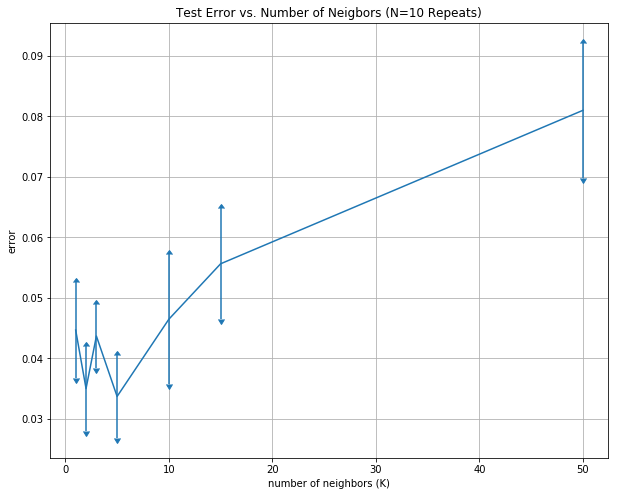

In [26]:
# plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.errorbar(K_s, K_errors, yerr=K_errors_std, uplims=True, lolims=True)


ax.set_xlabel("number of neighbors (K)")
ax.set_ylabel("error")
ax.grid()
ax.set_title("Test Error vs. Number of Neigbors (N=10 Repeats)")

## <img src="https://img.icons8.com/dusk/64/000000/artificial-intelligence.png" style="height:50px;display:inline"> The Perceptron
We will now implement the Perceptron and test its performance.

In [49]:
# Perceptron
class MlabPerceptron():
    "This class implements a Perceptron Classifier"
    def __init__(self, num_epochs=10, alpha=0.5):
        """
        Initialize the classfier
        :param num_epochs: how many epochs to run on the data
        :param alpha: learning rate
        """
        self.num_epochs = num_epochs
        self.alpha = alpha
        self.w = None  # no weights
        
    def fit(self, X, y, verbose=False):
        """
        Train the classfier
        :param X: features
        :param y: labels
        """
        if isinstance(X, csr_matrix):
            X = X.todense()
        y = np.array(y, dtype=np.int)
        y[y == 0] = -1  # 0 -> -1
        num_samples = X.shape[0]
        num_features = X.shape[1]
        # initialize weights
        self.w = np.ones((1, num_features + 1))  # including bias term b
        # train
        for epoch in tqdm(range(self.num_epochs)):
            num_updates = 0  # how many updates were performed
            """
            Your Code Here
            Remeber that you have 2 stopping criterions
            1. Reached maximum number of epochs
            2. No more updates to the weights
            """
            for i in range(num_samples):
                sample = np.concatenate((np.array([1]).reshape(1,-1), X[i, :]) ,axis=1)
                y_roof = 1 if (np.dot(self.w, np.transpose(sample)) >= 0) else -1
                if y_roof != y[i]:
                    self.w += self.alpha * (y[i] - y_roof) * sample
                    num_updates += 1
                
            if num_updates == 0:
                break
                
            if verbose:
                print("epoch {}: {} updates".format(epoch, num_updates))
                
    def predict(self, X):
        """
        Predict labels for features
        :param X: features
        :return y_pred: predictions
        """
        if self.w is None:
            print("can't call 'predict' before 'fit'")
            return
        
        if isinstance(X, csr_matrix):
            X = X.todense()

        y_pred = []
        for i in range(X.shape[0]):
            sample = np.concatenate((np.array([1]).reshape(1,-1), X[i, :]), axis=1)
            y_roof = 1 if (np.dot(self.w, np.transpose(sample)) >= 0) else -1
            y_pred.append(y_roof)
            
            
        y_pred = np.array(y_pred)
        y_pred[y_pred == -1] = 0  # -1 -> 0
        return y_pred.tolist()

In [66]:
# let's see it in action

X = email_data['Content'].values
y = email_data['Label'].values == 'S'  # 1 Spam, 0 for Ham

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_augmented_train = email_pipeline.fit_transform(X_train)
X_augmented_test = email_pipeline.transform(X_test)

# train and test
perc_clf = MlabPerceptron(num_epochs=10, alpha=0.5)
perc_clf.fit(X_augmented_train, y_train, verbose=True)
y_pred = perc_clf.predict(X_augmented_test)
print(np.mean(y_pred == y_test))


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 0: 540 updates
epoch 1: 352 updates



 20%|██        | 2/10 [00:00<00:00, 12.19it/s]

epoch 2: 355 updates
epoch 3: 308 updates



 40%|████      | 4/10 [00:00<00:00, 12.37it/s]

epoch 4: 201 updates
epoch 5: 193 updates



 60%|██████    | 6/10 [00:00<00:00, 12.62it/s]

epoch 6: 181 updates
epoch 7: 176 updates



 80%|████████  | 8/10 [00:00<00:00, 12.80it/s]

epoch 8: 179 updates
epoch 9: 169 updates



100%|██████████| 10/10 [00:00<00:00, 12.91it/s]

0.955810147299509


In [51]:
# let's look at the weights
print(perc_clf.w)

[[-8.440e+02  4.517e+03 -1.650e+02  1.470e+02 -1.230e+03  4.820e+02
   2.068e+03 -3.892e+03 -3.600e+01 -1.560e+02 -5.050e+02 -7.940e+02
  -8.290e+02  3.010e+02  1.840e+03  3.410e+02 -6.980e+02 -2.400e+01
  -3.000e+02 -1.360e+02 -7.800e+01 -1.150e+02 -3.680e+02  2.580e+02
   2.500e+02  1.456e+03 -9.210e+02  5.200e+01 -4.350e+02 -8.760e+02
  -4.220e+02 -8.900e+01 -2.700e+01  1.500e+02  1.220e+02 -2.110e+02
  -3.360e+02  1.870e+02  4.590e+02 -3.700e+01  5.100e+01  2.590e+02
  -3.190e+02 -5.420e+02 -1.290e+02  7.200e+01 -7.120e+02 -8.900e+01
  -2.700e+02 -1.640e+02 -4.340e+02 -1.600e+01  3.170e+02  1.090e+02
  -2.990e+02 -2.420e+02 -1.850e+02 -2.320e+02 -4.150e+02 -2.290e+02
  -1.810e+02 -3.990e+02 -8.400e+01  1.790e+02 -1.110e+02  2.720e+02
  -1.510e+02 -2.670e+02  2.040e+02 -1.630e+02 -1.900e+01 -3.140e+02
  -2.030e+02  1.570e+02 -1.540e+02  6.770e+02  1.700e+01 -2.130e+02
  -2.620e+02 -3.530e+02 -1.160e+02 -3.310e+02 -1.130e+02 -2.000e+01
  -3.600e+01  6.380e+02 -1.340e+02  1.340e+02 -3

In [67]:
num_repeats = 20
num_epochs = 50

current_errors = []
for j in range(num_repeats):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    X_augmented_train = email_pipeline.fit_transform(X_train)
    X_augmented_test = email_pipeline.transform(X_test)
    perc_clf = MlabPerceptron(num_epochs=num_epochs, alpha=0.5)
    perc_clf.fit(X_augmented_train, y_train)
    y_pred = perc_clf.predict(X_augmented_test)
    current_errors.append(1 - np.mean(y_pred == y_test))
    
perc_error = np.mean(current_errors)
perc_error_std = np.std(current_errors)
print("perceptron error: {}, std: {}".format(perc_error, perc_error_std))


 60%|██████    | 30/50 [00:02<00:01, 13.95it/s]


 20%|██        | 10/50 [00:00<00:03, 12.64it/s]


 84%|████████▍ | 42/50 [00:03<00:00, 13.45it/s]


100%|██████████| 50/50 [00:03<00:00, 13.64it/s]

perceptron error: 0.0666939443535188, std: 0.1162419830236724


In [68]:
print(current_errors)

[0.029459901800327315, 0.018003273322422242, 0.029459901800327315, 0.11129296235679209, 0.022913256955810146, 0.02782324058919805, 0.029459901800327315, 0.026186579378068786, 0.1669394435351882, 0.039279869067103124, 0.036006546644844484, 0.022913256955810146, 0.03109656301145658, 0.5499181669394435, 0.02782324058919805, 0.04255319148936165, 0.021276595744680882, 0.021276595744680882, 0.022913256955810146, 0.057283142389525366]


## <img src="https://img.icons8.com/dusk/64/000000/prize.png" style="height:50px;display:inline"> Credits
* Icons from <a href="https://icons8.com/">Icon8.com</a> - https://icons8.com
* Datasets from <a href="https://www.kaggle.com/">Kaggle</a> - https://www.kaggle.com/
* Notebook made by <a href="mailto:taldanielm@campus.technion.ac.il">Tal Daniel</a>